# PCA of Fecal Virome Samples - Taxonomy

This is a PCA of Sarah's fecal virome datasets.

In [37]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns
import json
from natsort import natsorted

# Taxonomy: Genus

The genus level is probably a bit low. We have **5,733 variables and 42 samples**


# Read the data into a dataframe

For the PCA we want the columns to be the loadings we want to explore, and the rows to be the variables that we are explaining. In this case, we want the columns to be the genera, and the rows to be the samples.

In [38]:
df = pd.read_csv(f"sarah/mmseqs_taxonomy/genus_renamed.tsv", delimiter="\t")
df = df.set_index("#NAME")
# we put a space in front of these names so they sort to the beginning. Don't forget that later!
df2 = df.rename(columns={'SJ3_Bact': ' SJ3_Bact', 'SJ4_Bact': ' SJ4_Bact'})

df = df2.reindex(natsorted(df2.columns), axis=1)
df = df.T
df.head(4)

#NAME,g__Endobacter,g__Geosporobacter,g__Plantactinospora,g__Actinomyces,g__Geotrichum,g__Caenibacillus,g__Duganella,g__Ostreobium,g__Mazuvirus,g__Dimorphilus,...,g__Ahrensia,g__Bertelyvirus,g__Odontella,g__Breznakia,g__Desulfurobacterium,g__Acetitomaculum,g__Anabas,g__Candidatus Kuenenia,g__Wallemia,g__Candidatus Desulfaltia
SJ3_Bact,0,12,0,630,0,0,2,1,4,1,...,0,0,1,7,7,206,0,11,2,2
SJ4_Bact,0,13,5,1286,0,0,1,6,7,0,...,1,0,6,17,2,227,0,17,3,0
SJ3_B_Na_22_1,0,79,0,71,0,0,2,1,62,0,...,0,1,0,6,3,56,1,7,2,9
SJ3_B_Na_22_1.1,0,89,0,42,0,0,3,0,31,0,...,0,0,0,0,0,19,0,2,0,30


# Normalise by row sum

We need to normalise this data, and so we divide by the sum of the rows - i.e. how many sequences match from each sample

In [39]:
df = df.div(df.sum(axis=1), axis=0)
df.head(5)

#NAME,g__Endobacter,g__Geosporobacter,g__Plantactinospora,g__Actinomyces,g__Geotrichum,g__Caenibacillus,g__Duganella,g__Ostreobium,g__Mazuvirus,g__Dimorphilus,...,g__Ahrensia,g__Bertelyvirus,g__Odontella,g__Breznakia,g__Desulfurobacterium,g__Acetitomaculum,g__Anabas,g__Candidatus Kuenenia,g__Wallemia,g__Candidatus Desulfaltia
SJ3_Bact,0.0,0.000003,0.000000,0.000167,0.0,0.0,5.290613e-07,2.645307e-07,0.000001,2.645307e-07,...,0.000000e+00,0.000000e+00,2.645307e-07,0.000002,1.851715e-06,0.000054,0.000000e+00,2.909837e-06,5.290613e-07,5.290613e-07
SJ4_Bact,0.0,0.000004,0.000002,0.000427,0.0,0.0,3.321927e-07,1.993156e-06,0.000002,0.000000e+00,...,3.321927e-07,0.000000e+00,1.993156e-06,0.000006,6.643854e-07,0.000075,0.000000e+00,5.647276e-06,9.965781e-07,0.000000e+00
SJ3_B_Na_22_1,0.0,0.000021,0.000000,0.000019,0.0,0.0,5.315352e-07,2.657676e-07,0.000016,0.000000e+00,...,0.000000e+00,2.657676e-07,0.000000e+00,0.000002,7.973028e-07,0.000015,2.657676e-07,1.860373e-06,5.315352e-07,2.391908e-06
SJ3_B_Na_22_1.1,0.0,0.000041,0.000000,0.000019,0.0,0.0,1.386689e-06,0.000000e+00,0.000014,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000009,0.000000e+00,9.244596e-07,0.000000e+00,1.386689e-05
SJ3_B_Na_45_1,0.0,0.000036,0.000000,0.000015,0.0,0.0,2.641021e-07,2.641021e-07,0.000025,2.641021e-07,...,2.641021e-07,0.000000e+00,5.282041e-07,0.000000,1.056408e-06,0.000012,0.000000e+00,1.320510e-06,0.000000e+00,5.282041e-06


## Create some new labels

Here I used [named groups](https://docs.python.org/3/howto/regex.html#non-capturing-and-named-groups) to create a regular expression with variable names that we can access later. The basic syntax is `(?P<Name>...)` for the named group, so we split the abbreviation (e.g. SJ3_B_Qi_22_2) into its component parts, the Sample (SJ3), the approach (B|I|A), the Method (No|Na|Qi|Ma), the filter size (22|45) and the repeat (1|2|3).

We make columns for each of those, and then we set the column names for the two bacterial samples

In [40]:
pattern = r'(?P<Sample>SJ\d)_(?P<Approach>\w+)_(?P<Method>\w+)_(?P<Filter>\d+)_(?P<Rpt>\d+)'
tmp = df.index.str.extract(pattern)
cols = ['Sample', 'Approach', 'Method', 'Filter', 'Rpt']
labels = pd.DataFrame()
labels[cols] = tmp[cols].values
labels.at[0, 'Sample'] = 'SJ3_Bact'
labels.at[0, 'Approach'] = 'SJ3_Bact'
labels.at[0, 'Method'] = 'SJ3_Bact'
labels.at[0, 'Filter'] = 'SJ3_Bact'
labels.at[0, 'Rpt'] = 'SJ3_Bact'
labels.at[1, 'Sample'] = 'SJ4_Bact'
labels.at[1, 'Approach'] = 'SJ4_Bact'
labels.at[1, 'Method'] = 'SJ4_Bact'
labels.at[1, 'Filter'] = 'SJ4_Bact'
labels.at[1, 'Rpt'] = 'SJ4_Bact'
labels.head(10)

,Sample,Approach,Method,Filter,Rpt
0,SJ3_Bact,SJ3_Bact,SJ3_Bact,SJ3_Bact,SJ3_Bact
1,SJ4_Bact,SJ4_Bact,SJ4_Bact,SJ4_Bact,SJ4_Bact
2,SJ3,B,Na,22,1
3,SJ3,B,Na,22,1
4,SJ3,B,Na,45,1
5,SJ3,B,Na,45,2
6,SJ3,B,Na,45,3
7,SJ3,B,No,22,1
8,SJ3,B,No,22,2
9,SJ3,B,No,22,3


# Standardise the data

In [41]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[-0.18437392, -1.27905234, -0.42569979, ...,  1.49673098,
        -0.00998115, -0.57918829],
       [-0.18437392, -1.24934499,  2.64531398, ...,  3.52485081,
         0.51602826, -0.64270313],
       [-0.18437392, -0.8163257 , -0.42569979, ...,  0.71920146,
        -0.0071978 , -0.35554988],
       ...,
       [-0.18437392,  1.18217153, -0.42569979, ..., -0.45694202,
         0.00881335, -0.64270313],
       [-0.18437392,  3.57631044, -0.42569979, ..., -0.04250784,
        -0.60523523, -0.64270313],
       [-0.18437392,  0.63003   , -0.42569979, ..., -0.36314906,
        -0.60523523, -0.64270313]])

## Run the PCA with 4 components

In [42]:
pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [43]:
zipped = list(zip(df_pca[:,0],
                  df_pca[:,1],
                  df_pca[:,2],
                  df_pca[:,3],
                  df.index))
pc_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Label"])
pc_df = pd.concat([pc_df, labels], axis=1)
pc_df.head(4)

pc_df['SampleApproachMethodFilter'] = pc_df['Sample'] + pc_df['Approach'] + pc_df['Method'] + pc_df['Filter']
pc_df.at[0, 'SampleApproachMethodFilter'] = 'SJ3_Bact'
pc_df.at[1, 'SampleApproachMethodFilter'] = 'SJ4_Bact'

## Make an initial plot to see what the data looks like

We just plot the first two components and label by the complete label for now.

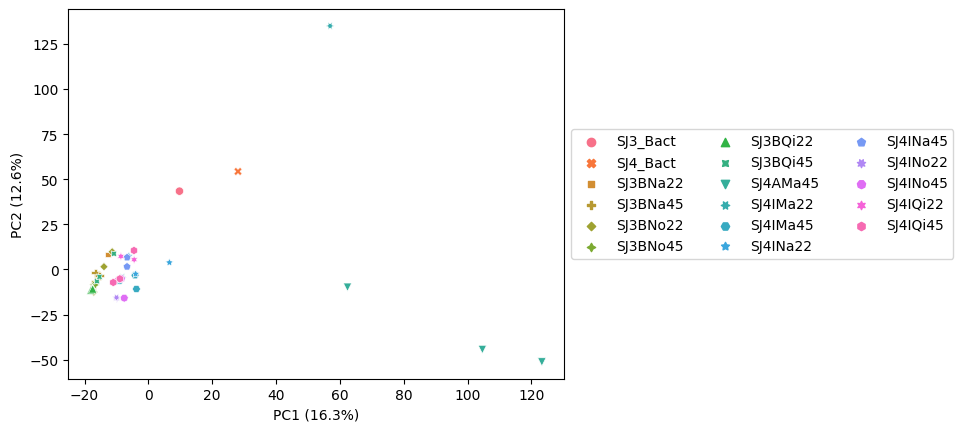

In [44]:
ax = sns.scatterplot(x="PC1", y="PC2", hue='SampleApproachMethodFilter', style='SampleApproachMethodFilter', data=pc_df)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
l = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

One of these, in particular, `SJ4IMa22`, seems to be a bit whacky!

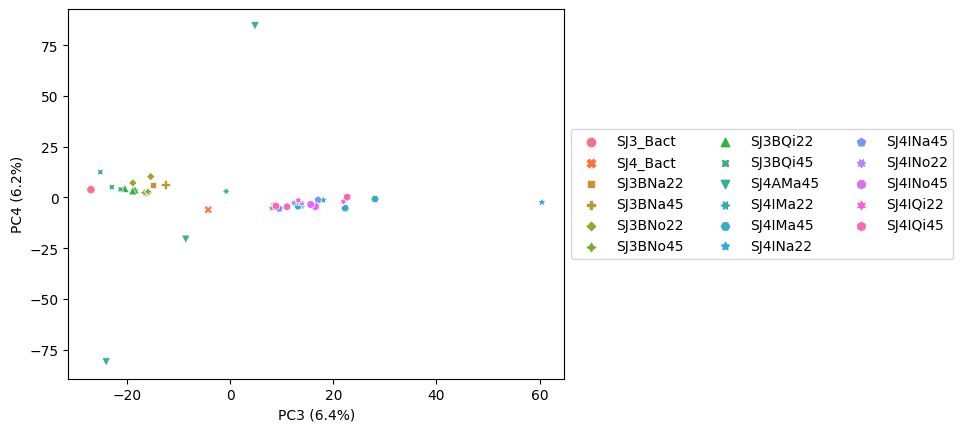

In [45]:
ax = sns.scatterplot(x="PC3", y="PC4", hue='SampleApproachMethodFilter', style='SampleApproachMethodFilter', data=pc_df)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
l = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

The whacky one does not look so bad on PC3/PC4

# Very variable method? (Or is it contamination?)

Let's dig in a little more at that whacky one, and take a look at the principle components of sample `SJ4IMa22`


In [46]:
pc_df[pc_df['SampleApproachMethodFilter']=='SJ4IMa22']

,PC1,PC2,PC3,PC4,Label,Sample,Approach,Method,Filter,Rpt,SampleApproachMethodFilter
21,56.910916,134.995886,-0.776381,3.017716,SJ4_I_Ma_22_1,SJ4,I,Ma,22,1,SJ4IMa22
22,-8.196050,-4.264287,13.882465,-4.319597,SJ4_I_Ma_22_2,SJ4,I,Ma,22,2,SJ4IMa22
23,-9.359488,-6.662483,13.116081,-4.152561,SJ4_I_Ma_22_3,SJ4,I,Ma,22,3,SJ4IMa22


**NOTICE** That the PC1 for sample 1 is 56 while the other PC1's are approx. -8. This suggests that this sample has a lot of contamination. Lets plot a little heatmap of just these three replicates to see how they compare

What is the genus with the maximum value in `SJ4_I_Ma_22` samples (and we also add `SJ4_I_M_45` samples for good measure)?

In [70]:
df.idxmax(axis=1)[['SJ4_I_Ma_22_1', 'SJ4_I_Ma_22_2', 'SJ4_I_Ma_22_3', 'SJ4_I_Ma_45_1', 'SJ4_I_Ma_45_2', 'SJ4_I_Ma_45_3']]

SJ4_I_Ma_22_1    g__Ruminococcus
SJ4_I_Ma_22_2      g__Prevotella
SJ4_I_Ma_22_3      g__Prevotella
SJ4_I_Ma_45_1     g__Phocaeicola
SJ4_I_Ma_45_2      g__Prevotella
SJ4_I_Ma_45_3      g__Prevotella
dtype: object

In [48]:
dfcontam = df.loc[['SJ4_I_Ma_22_1', 'SJ4_I_Ma_22_2', 'SJ4_I_Ma_22_3', 'SJ4_I_Ma_45_1', 'SJ4_I_Ma_45_2', 'SJ4_I_Ma_45_3']]
dfcontam

#NAME,g__Endobacter,g__Geosporobacter,g__Plantactinospora,g__Actinomyces,g__Geotrichum,g__Caenibacillus,g__Duganella,g__Ostreobium,g__Mazuvirus,g__Dimorphilus,...,g__Ahrensia,g__Bertelyvirus,g__Odontella,g__Breznakia,g__Desulfurobacterium,g__Acetitomaculum,g__Anabas,g__Candidatus Kuenenia,g__Wallemia,g__Candidatus Desulfaltia
SJ4_I_Ma_22_1,0.0,0.000008,7.840411e-07,0.000329,2.613470e-07,0.0,0.000002,3.397511e-06,0.000003,1.306735e-06,...,5.226941e-07,0.0,7.840411e-07,8.363105e-06,0.000002,0.000087,0.0,6.272329e-06,3.658858e-06,0.000000e+00
SJ4_I_Ma_22_2,0.0,0.000101,0.000000e+00,0.000046,0.000000e+00,0.0,0.000016,4.675117e-07,0.000007,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000037,0.0,0.000000e+00,4.675117e-07,0.000000e+00
SJ4_I_Ma_22_3,0.0,0.000096,0.000000e+00,0.000042,0.000000e+00,0.0,0.000013,5.069909e-07,0.000007,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000045,0.0,0.000000e+00,0.000000e+00,0.000000e+00
SJ4_I_Ma_45_1,0.0,0.000018,0.000000e+00,0.000040,2.807762e-07,0.0,0.000037,8.423285e-07,0.000024,2.807762e-07,...,5.615523e-07,0.0,2.807762e-07,8.423285e-07,0.000000,0.000006,0.0,5.615523e-07,2.807762e-07,2.807762e-07
SJ4_I_Ma_45_2,0.0,0.000090,0.000000e+00,0.000028,0.000000e+00,0.0,0.000031,0.000000e+00,0.000028,0.000000e+00,...,1.171201e-06,0.0,0.000000e+00,0.000000e+00,0.000000,0.000018,0.0,0.000000e+00,0.000000e+00,0.000000e+00
SJ4_I_Ma_45_3,0.0,0.000128,0.000000e+00,0.000037,0.000000e+00,0.0,0.000021,0.000000e+00,0.000003,3.961916e-07,...,3.961916e-07,0.0,0.000000e+00,0.000000e+00,0.000000,0.000060,0.0,7.923833e-07,1.188575e-06,0.000000e+00


# Plots

We plot this a couple of ways to explore the data.

Lets plot just those data, and we'll add `g__Bacteroides` because its the best! (and `g__Blautia` and `g__Clostridium` because they are also abundant)

<Axes: xlabel='#NAME'>

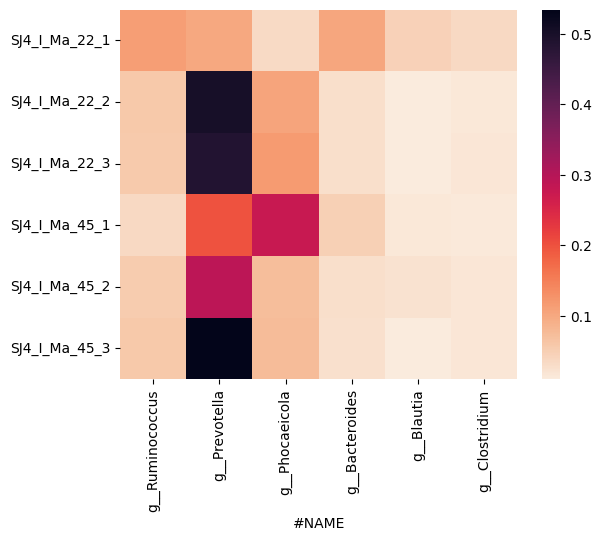

In [76]:
sns.heatmap(data=dfcontam[['g__Ruminococcus', 'g__Prevotella', 'g__Phocaeicola', 'g__Bacteroides', 'g__Blautia', 'g__Clostridium']], cmap="rocket_r")

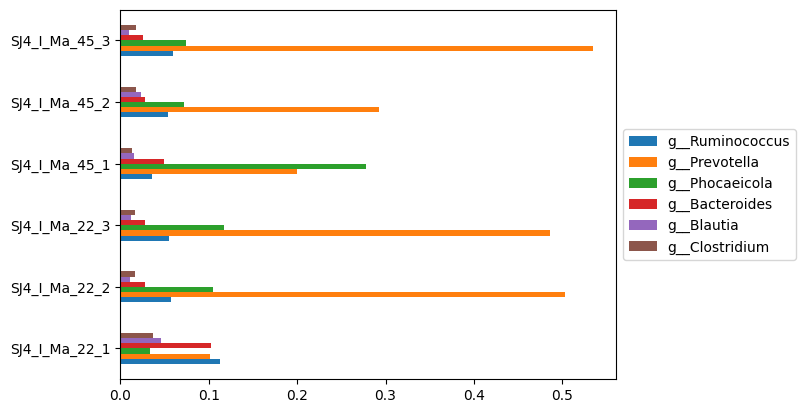

In [75]:
ax = dfcontam[['g__Ruminococcus', 'g__Prevotella', 'g__Phocaeicola', 'g__Bacteroides', 'g__Blautia', 'g__Clostridium']].plot(kind='barh')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


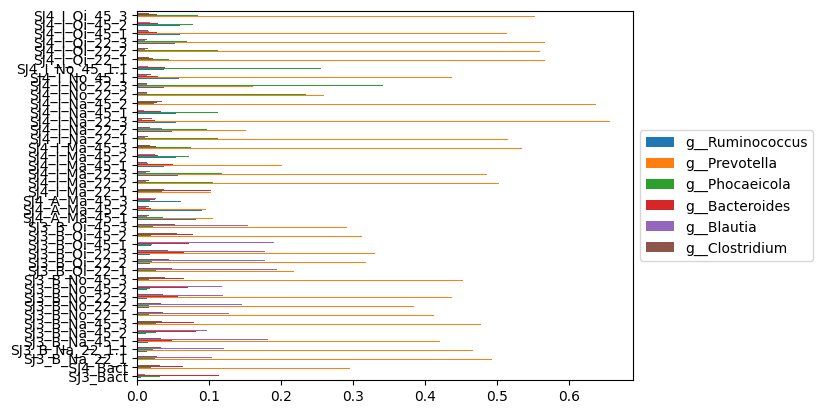

In [74]:
ax = df[['g__Ruminococcus', 'g__Prevotella', 'g__Phocaeicola', 'g__Bacteroides', 'g__Blautia', 'g__Clostridium']].plot(kind='barh')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [71]:
dvm = dfcontam[['g__Ruminococcus', 'g__Prevotella', 'g__Phocaeicola', 'g__Bacteroides', 'g__Blautia', 'g__Clostridium']].reset_index().melt(id_vars="index")
dvm

,index,#NAME,value
0,SJ4_I_Ma_22_1,g__Ruminococcus,0.113139
1,SJ4_I_Ma_22_2,g__Ruminococcus,0.057823
2,SJ4_I_Ma_22_3,g__Ruminococcus,0.055716
3,SJ4_I_Ma_45_1,g__Ruminococcus,0.036468
4,SJ4_I_Ma_45_2,g__Ruminococcus,0.053952
5,SJ4_I_Ma_45_3,g__Ruminococcus,0.059372
6,SJ4_I_Ma_22_1,g__Prevotella,0.101833
7,SJ4_I_Ma_22_2,g__Prevotella,0.502755
8,SJ4_I_Ma_22_3,g__Prevotella,0.485901
9,SJ4_I_Ma_45_1,g__Prevotella,0.200192


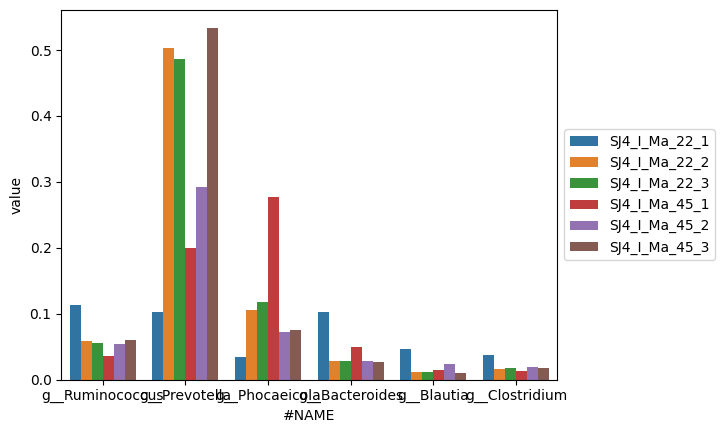

In [72]:
ax = sns.barplot(data=dvm, x='#NAME', y='value', hue='index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# There is one (possibly two?) bad apples

It looks like 

In [32]:
dfcontam

#NAME,p__Fornicata,p__Candidatus Kerfeldbacteria,p__Euryarchaeota,p__Acidobacteria,p__Cryptomycota,p__Candidatus Thorarchaeota,p__Candidatus Magasanikbacteria,p__Candidatus Riflebacteria,p__Candidatus Ratteibacteria,p__Rhodophyta,...,p__Pisuviricota,p__Candidatus Roizmanbacteria,p__Blastocladiomycota,p__candidate division CPR3,p__Candidatus Calescamantes,p__Candidatus Auribacterota,p__Streptophyta,p__Candidatus Delongbacteria,p__Nematoda,p__Rhodothermaeota
SJ4_I_Ma_22_1,53,9,3103,1987,8,39,70,45,12,122,...,1,80,12,19,1,14,8325,21,1927,30
SJ4_I_Ma_22_2,2,56,24772,267,0,31,2,1,1,9,...,2,7,0,0,0,2,1062,4,6435,4
SJ4_I_Ma_22_3,6,32,20354,217,0,41,4,4,0,16,...,2,10,0,0,0,1,887,2,5784,2


In [36]:
 df['p__Fornicata']

 SJ3_Bact          25
 SJ4_Bact          42
SJ3_B_Na_22_1      37
SJ3_B_Na_22_1.1     5
SJ3_B_Na_45_1      46
SJ3_B_Na_45_2       6
SJ3_B_Na_45_3       5
SJ3_B_No_22_1      38
SJ3_B_No_22_2      73
SJ3_B_No_22_3       1
SJ3_B_No_45_2       5
SJ3_B_No_45_3       5
SJ3_B_Qi_22_1       1
SJ3_B_Qi_22_2       0
SJ3_B_Qi_22_3       2
SJ3_B_Qi_45_1      37
SJ3_B_Qi_45_2      11
SJ3_B_Qi_45_3       6
SJ4_A_Ma_45_1       8
SJ4_A_Ma_45_2       2
SJ4_A_Ma_45_3       8
SJ4_I_Ma_22_1      53
SJ4_I_Ma_22_2       2
SJ4_I_Ma_22_3       6
SJ4_I_Ma_45_1      11
SJ4_I_Ma_45_2       8
SJ4_I_Ma_45_3       3
SJ4_I_Na_22_1      18
SJ4_I_Na_22_2       9
SJ4_I_Na_22_3       0
SJ4_I_Na_45_1      12
SJ4_I_Na_45_2       6
SJ4_I_No_22_2       8
SJ4_I_No_22_3       3
SJ4_I_No_45_1       5
SJ4_I_No_45_1.1     1
SJ4_I_Qi_22_1      18
SJ4_I_Qi_22_2      13
SJ4_I_Qi_22_3       4
SJ4_I_Qi_45_1      18
SJ4_I_Qi_45_2       8
SJ4_I_Qi_45_3       5
Name: p__Fornicata, dtype: int64

# Loadings

Lets get the loadings for the PCA, and then we can add them to this plot to see what they look like!

In [18]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

,PC1,PC2,PC3,PC4
#NAME,,,,
g__Endobacter,0.017046,-0.009671,-0.009823,-0.035361
g__Geosporobacter,-0.006692,-0.008520,0.021665,-0.001844
g__Plantactinospora,0.010869,0.007473,-0.003062,-0.019096


## To add the loadings to the figure:

1. We use `nlargest` to get the 5 largest loadings from the PCA (most important, presumably). However, we need to do the largest absolute value, but we need the actual values (not the `abs()`) for the plot, so we use the indices to get those values: `loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]`
2. Note you can change the 10 here to plot different numbers of loadings, and the PC1, PC2, etc to change the weights.
3. We figure out the maximum X and Y values for the loadings (mlx, mly) and the PCA (mpx, mpy)
4. We scale the loading value to make the maximum line ~1/2 of the total image. This is a bit random and you can change the `ex = ` and `ey = ` lines as you like. (e.g. just multiply by 10 or something)


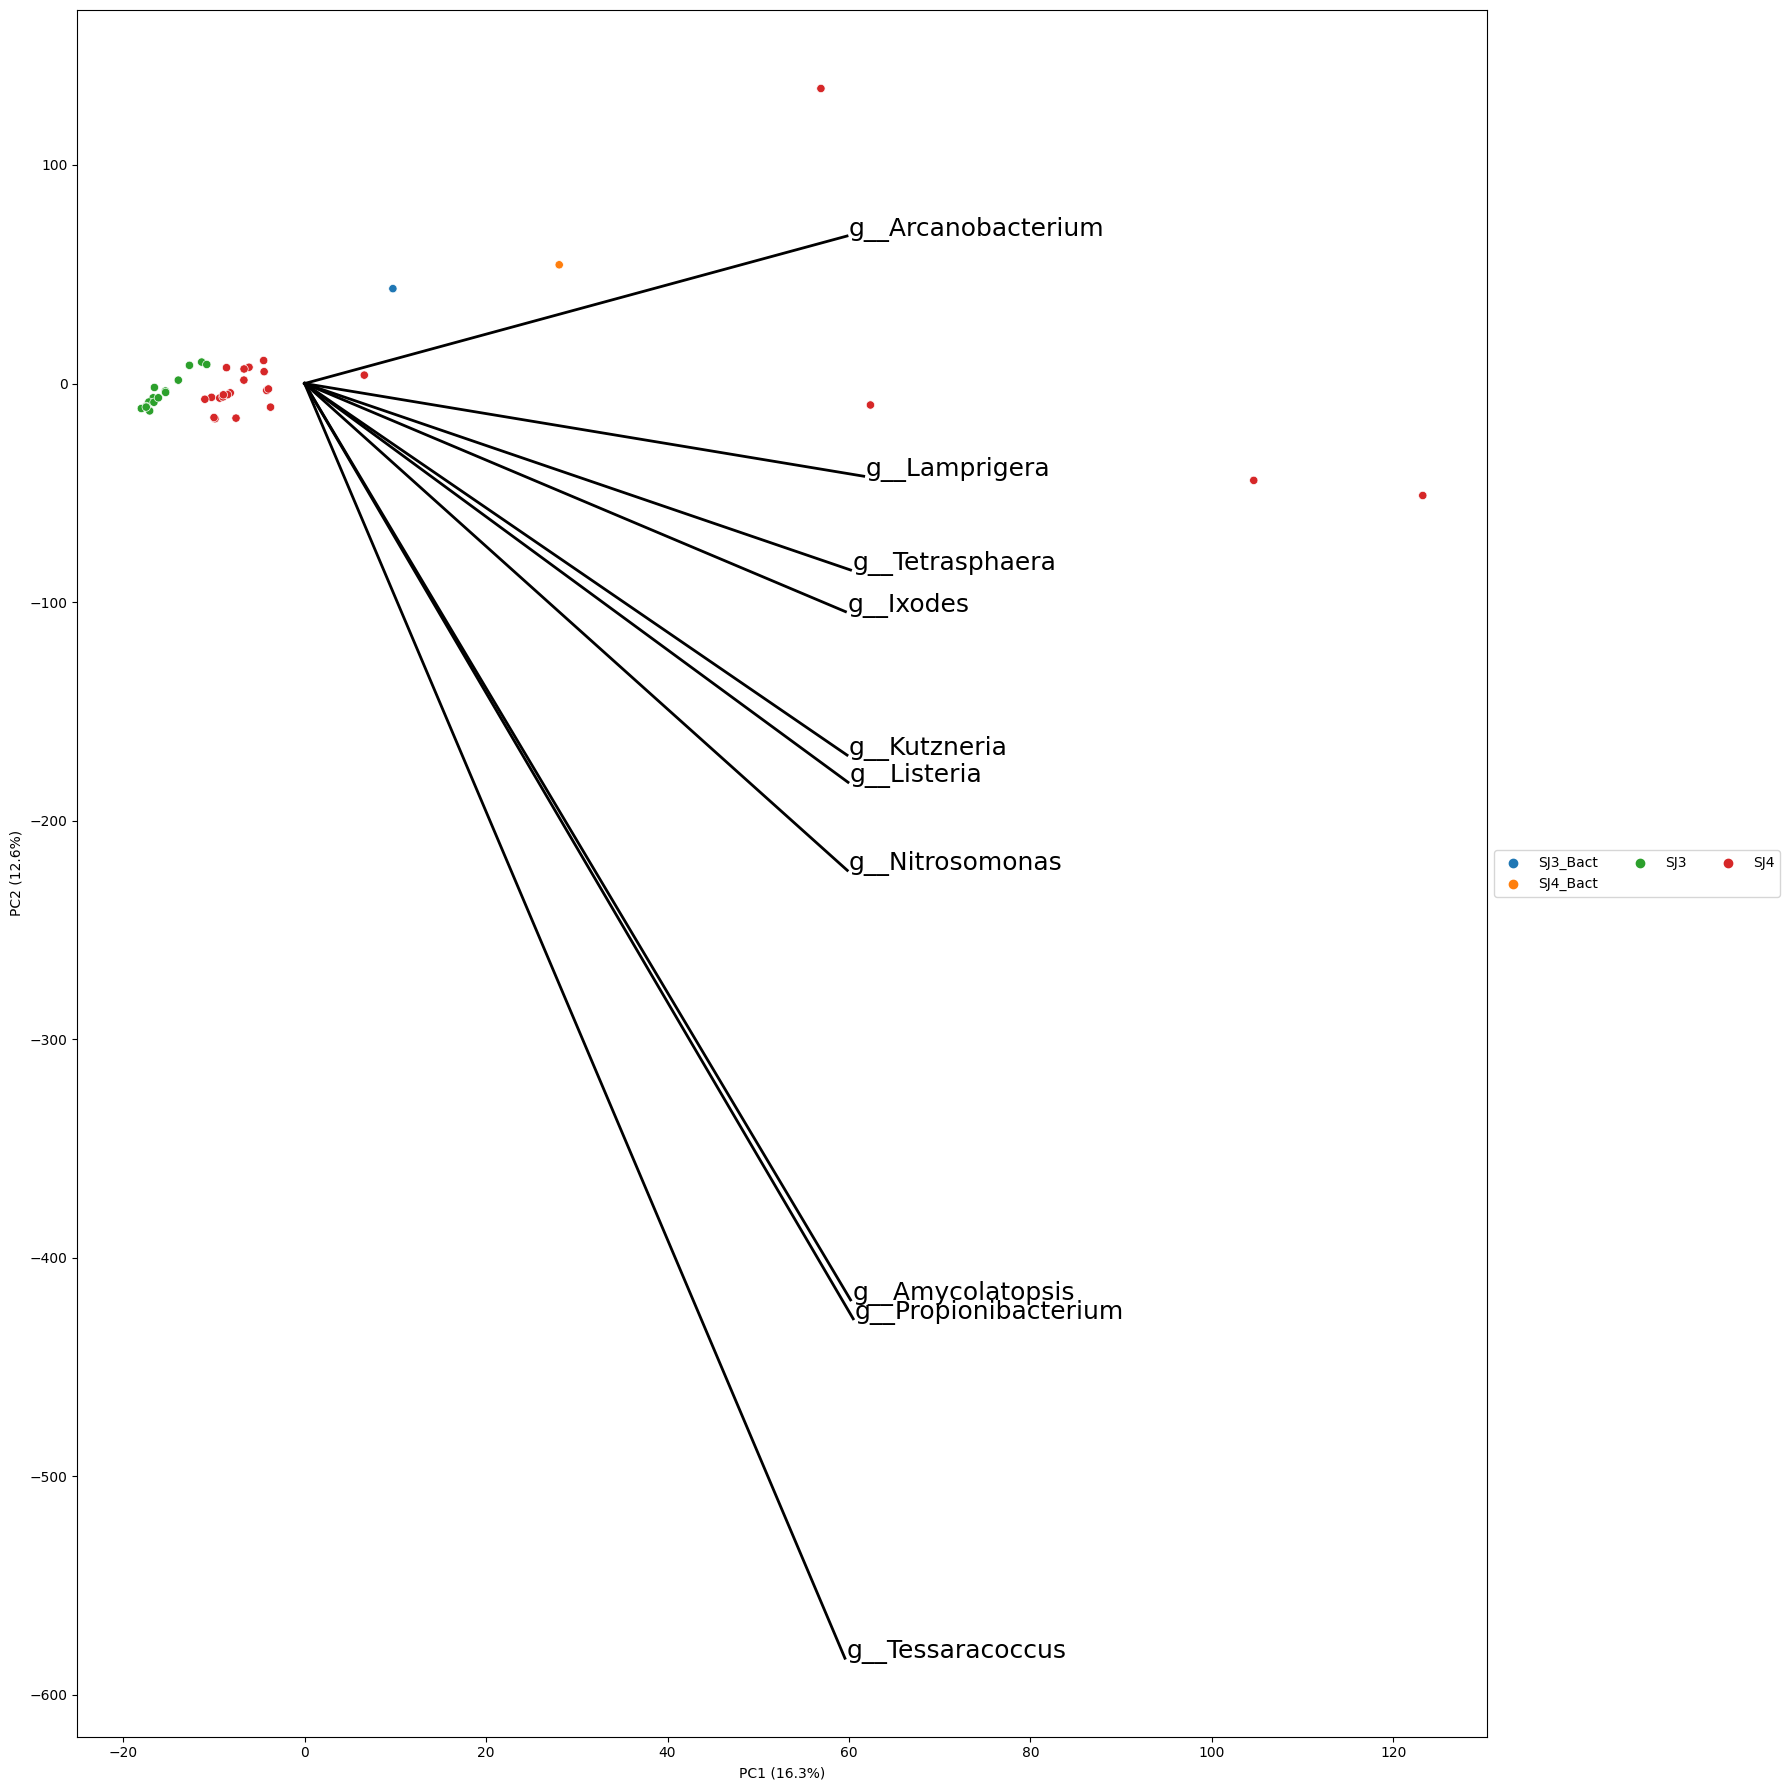

In [19]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Sample', legend=True, data=pc_df, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pc_df.PC1)
mpy = max(pc_df.PC2)

for i, l in ldf.iterrows():
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

# Colour the PCA by different components of the experiment

In this series of figures I leave the loadings off, because we are just interested in the similarities and differences between the samples, not the reason why they are similar and different!

I colour each image by a different value

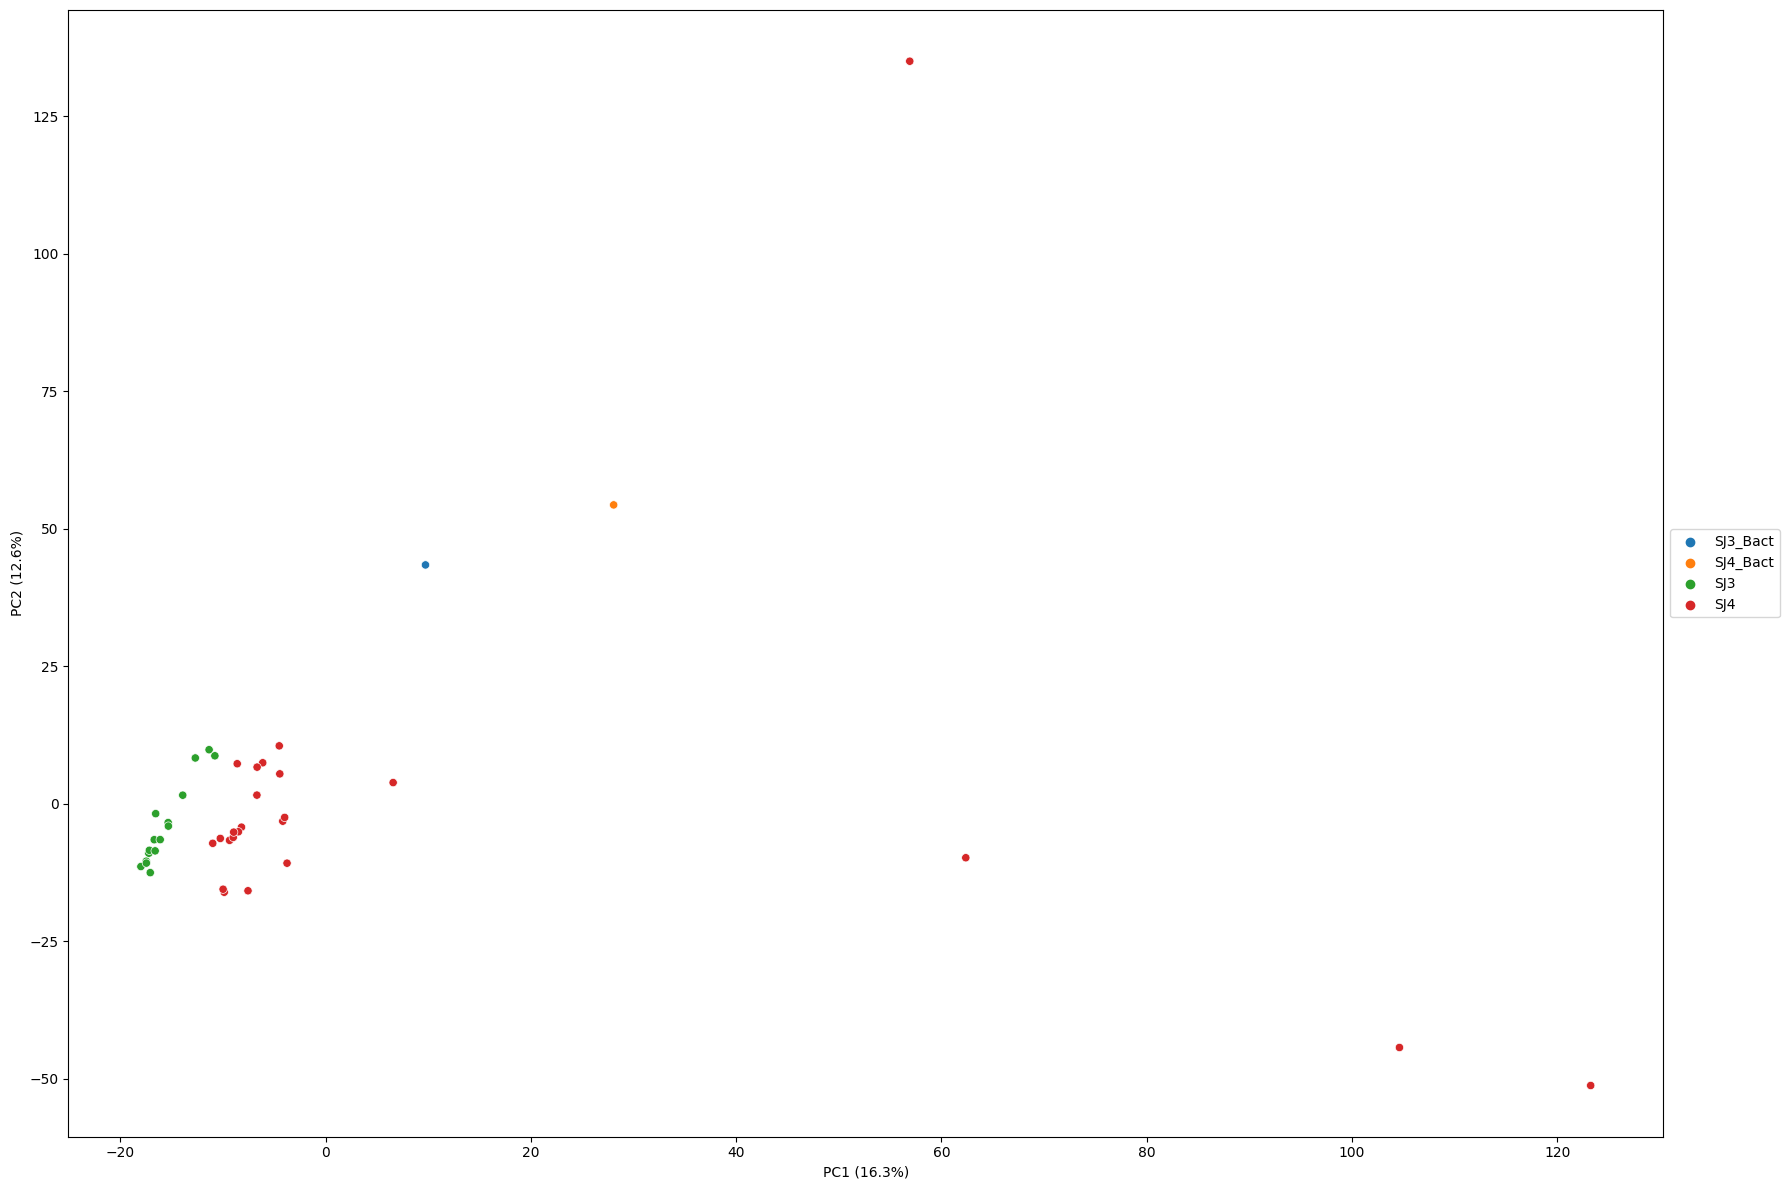

In [20]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.scatterplot(x="PC1", y="PC2", hue='Sample', legend=True, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig(f"sarah/mmseqs_taxonomy/pca_by_sample.png")

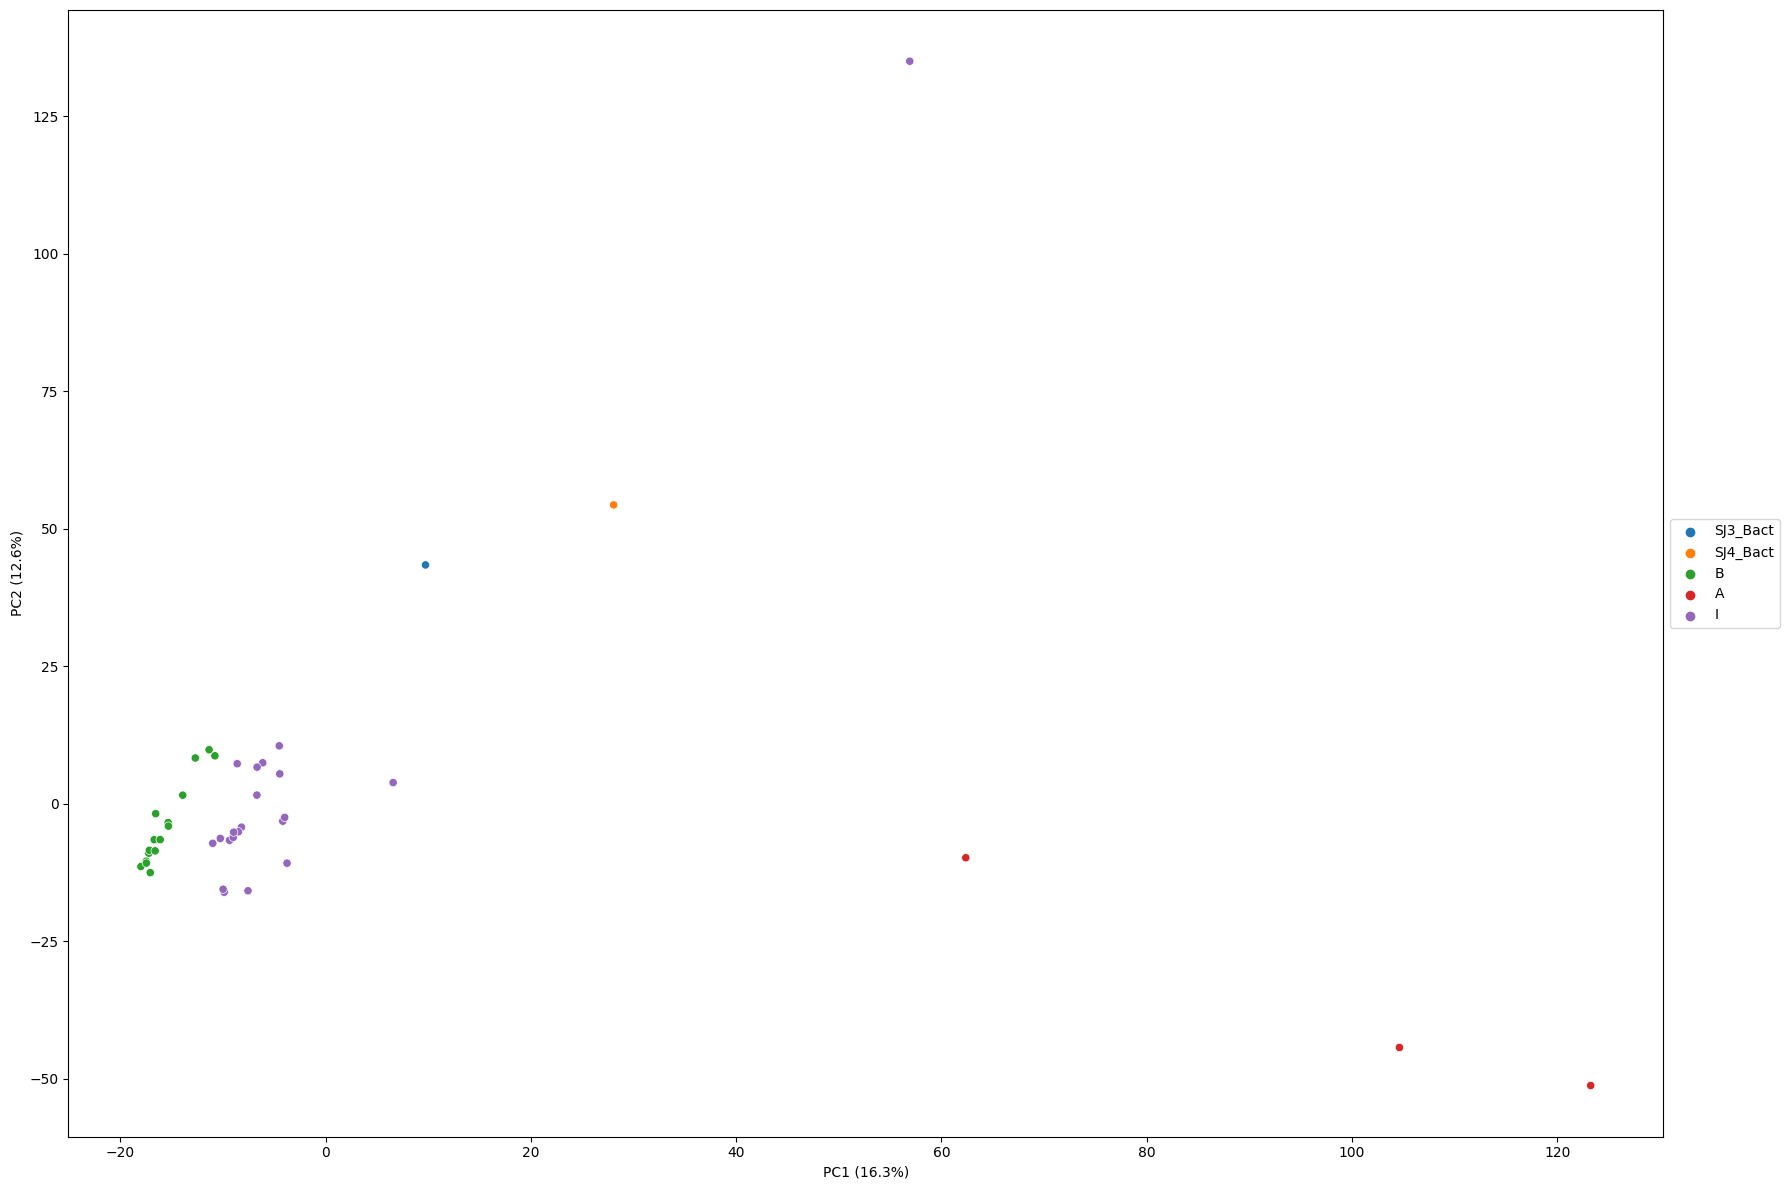

In [21]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.scatterplot(x="PC1", y="PC2", hue='Approach', legend=True, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig(f"sarah/mmseqs_taxonomy/pca_by_approach.png")

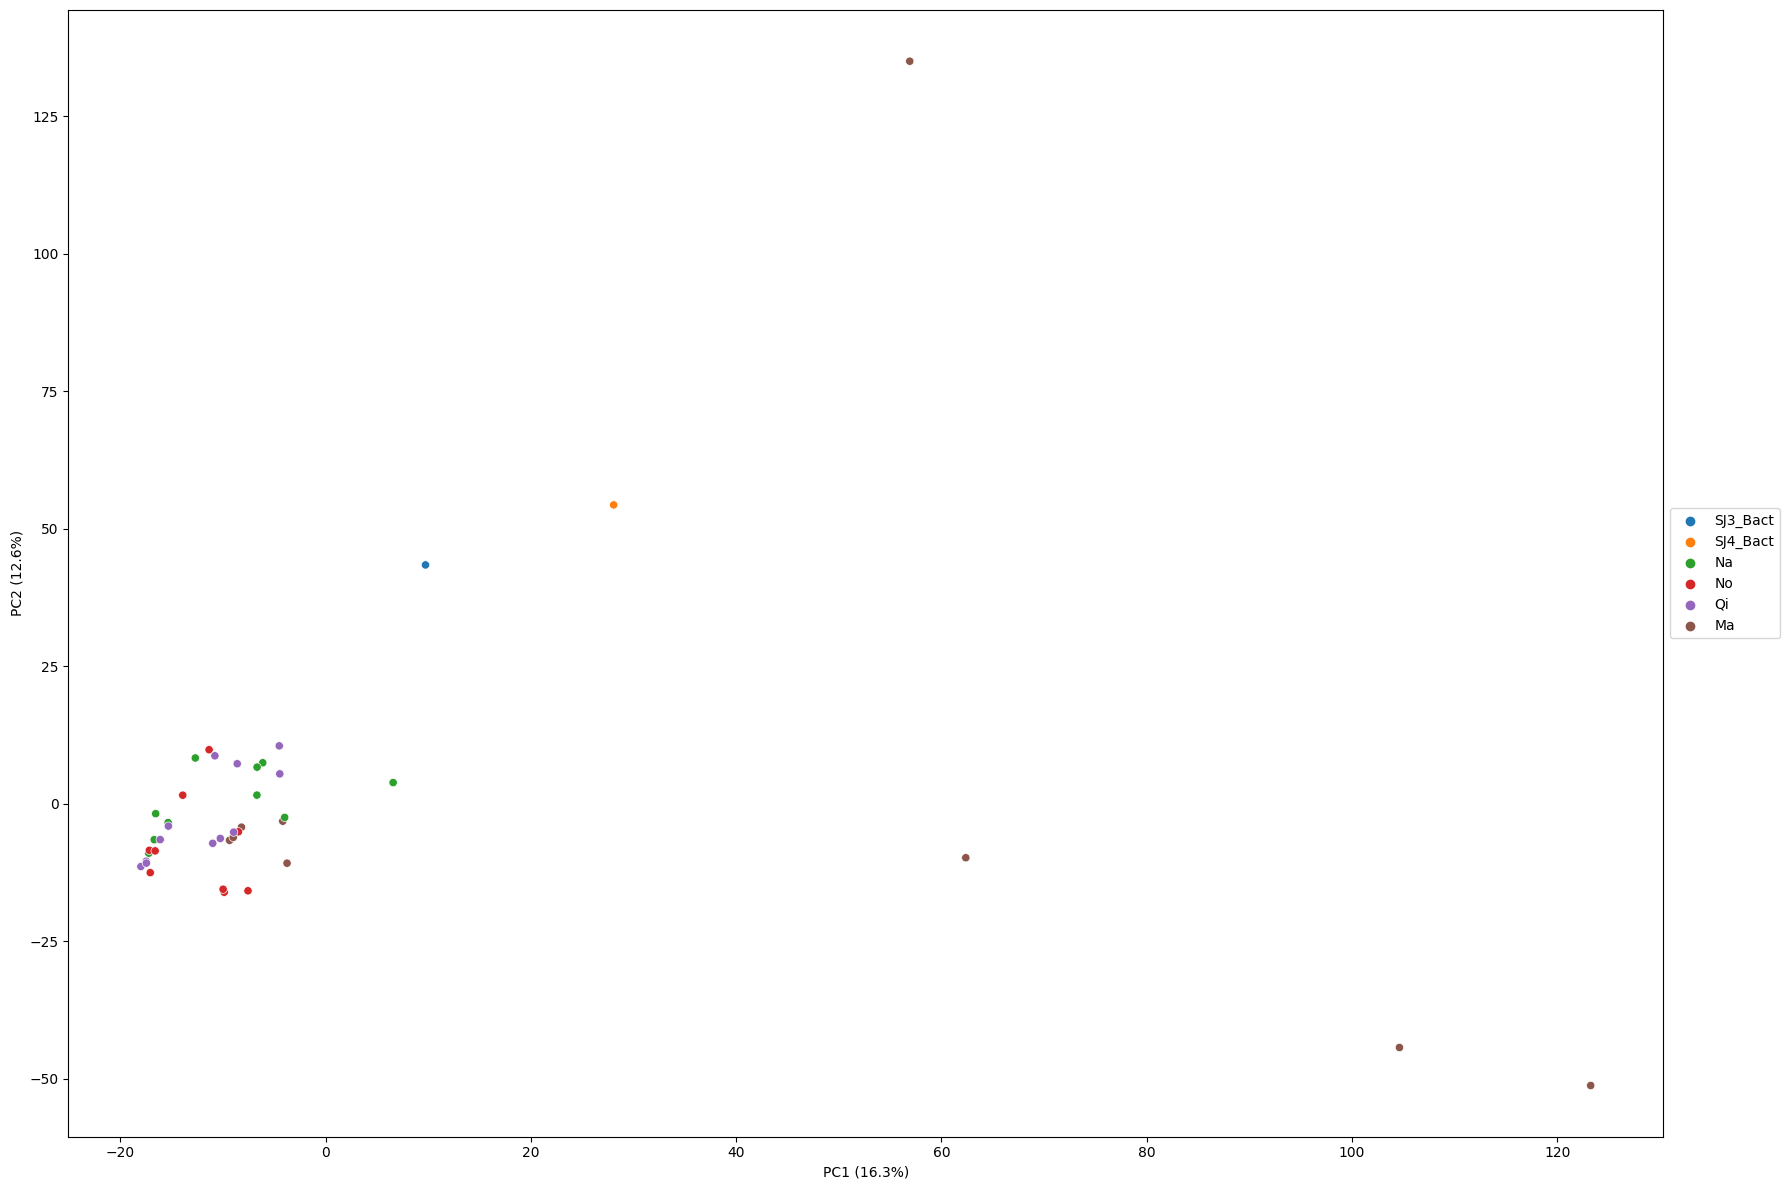

In [22]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.scatterplot(x="PC1", y="PC2", hue='Method', legend=True, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig(f"sarah/mmseqs_taxonomy/pca_by_method.png")

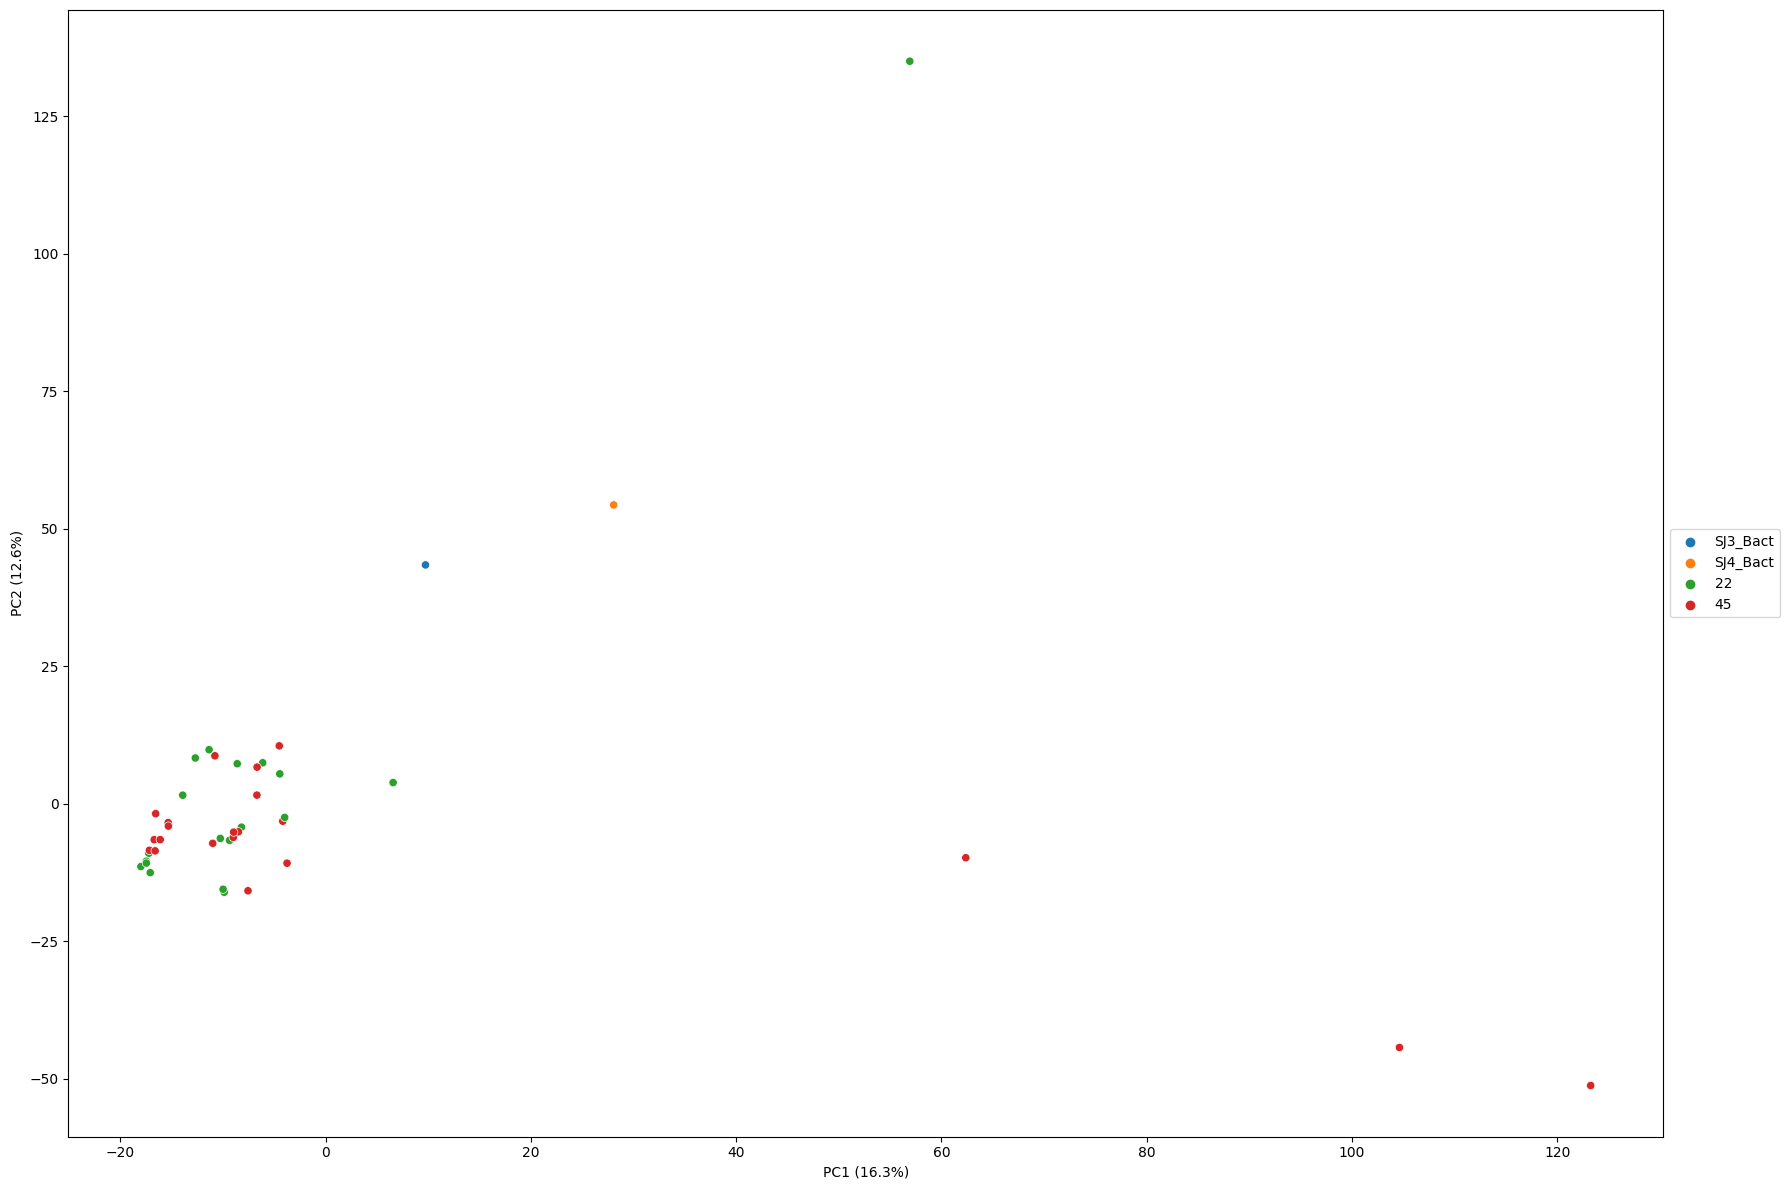

In [23]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.scatterplot(x="PC1", y="PC2", hue='Filter', legend=True, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig(f"sarah/mmseqs_taxonomy/pca_by_filter.png")

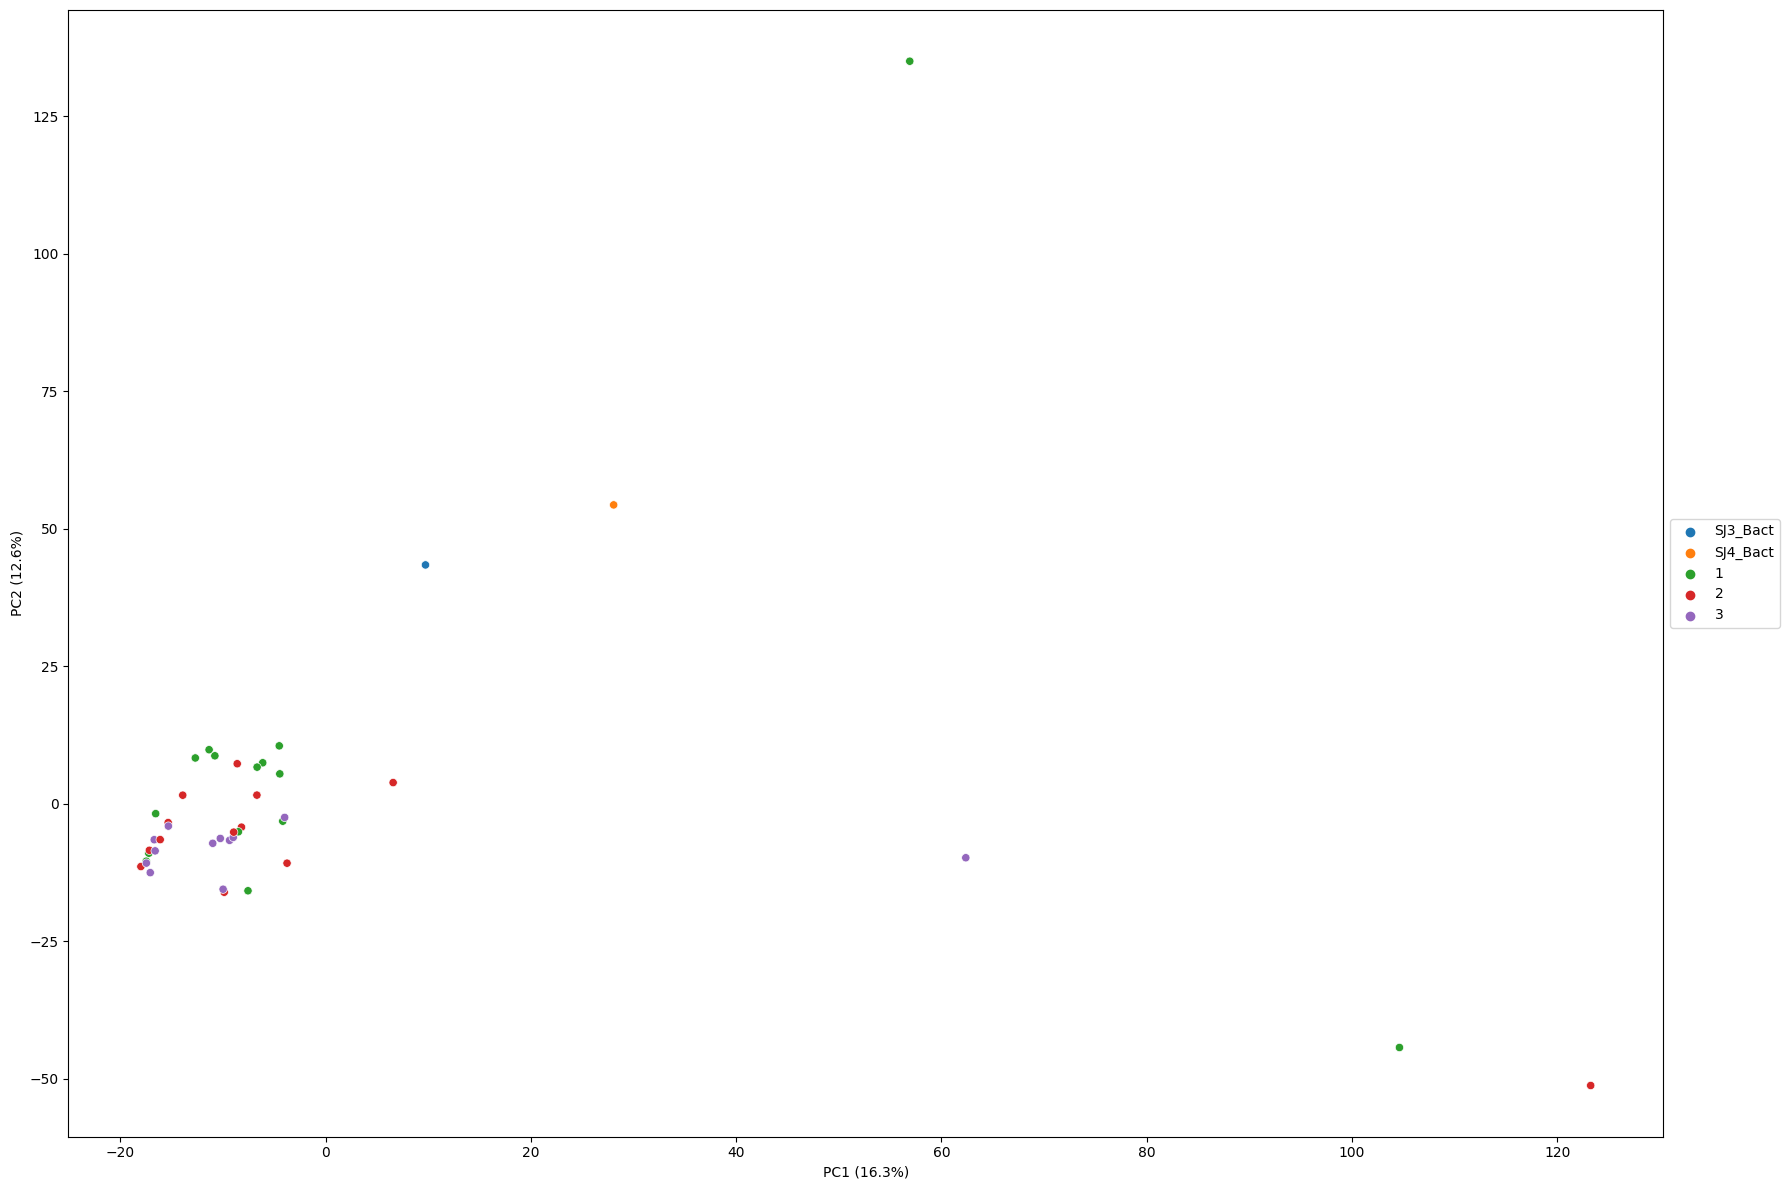

In [24]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.scatterplot(x="PC1", y="PC2", hue='Rpt', legend=True, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig(f"sarah/mmseqs_taxonomy/pca_by_replicate.png")

## Colour so all the samples are the same

In this image, we combine Sample, Approach, Method, and Filter so that we have 2 or 3 points per sample to see whether the replicates are close to each other or not. To clarify the results, I also change the marker, so now each group of replicates has the same colour and the same marker.

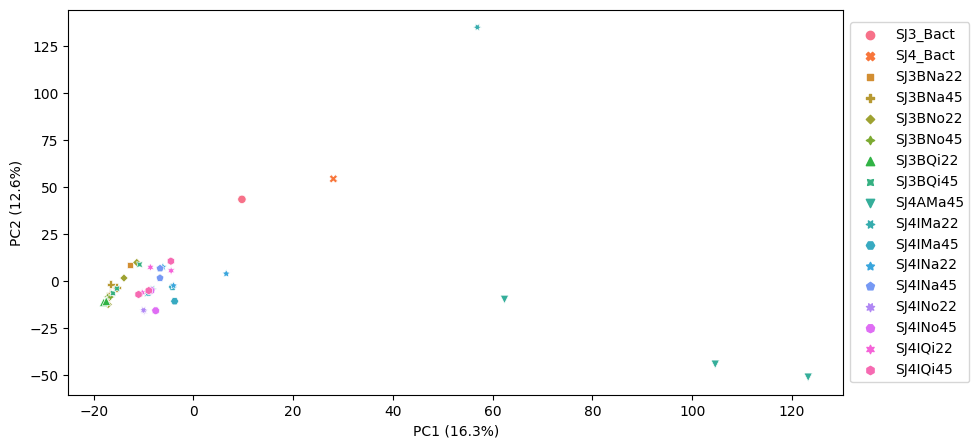

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x="PC1", y="PC2", hue='SampleApproachMethodFilter', style='SampleApproachMethodFilter', legend=True, data=pc_df)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig(f"sarah/mmseqs_taxonomy/pca_combined_replicates.png")

# Phylum

At the phylum level we have **248 variables (phyla) and 42 samples**

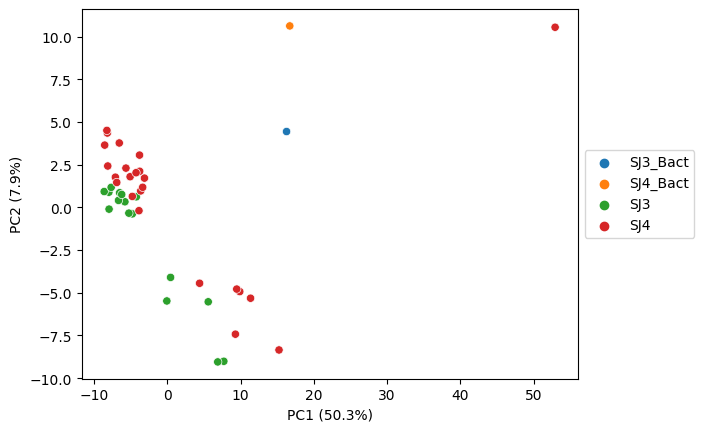

In [26]:
df = pd.read_csv(f"sarah/mmseqs_taxonomy/phylum_renamed.tsv", delimiter="\t")
df = df.set_index("#NAME")
# we put a space in front of these names so they sort to the beginning. Don't forget that later!
df2 = df.rename(columns={'SJ3_Bact': ' SJ3_Bact', 'SJ4_Bact': ' SJ4_Bact'})

df = df2.reindex(natsorted(df2.columns), axis=1)
df = df.T

# standardise the data
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

# run the PCA with 4 components
pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

# our labels from above have not changed
zipped = list(zip(df_pca[:,0],
                  df_pca[:,1],
                  df_pca[:,2],
                  df_pca[:,3],
                  df.index))
pc_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Label"])
pc_df = pd.concat([pc_df, labels], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)

ax = sns.scatterplot(x="PC1", y="PC2", hue='Sample', data=pc_df)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
l = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

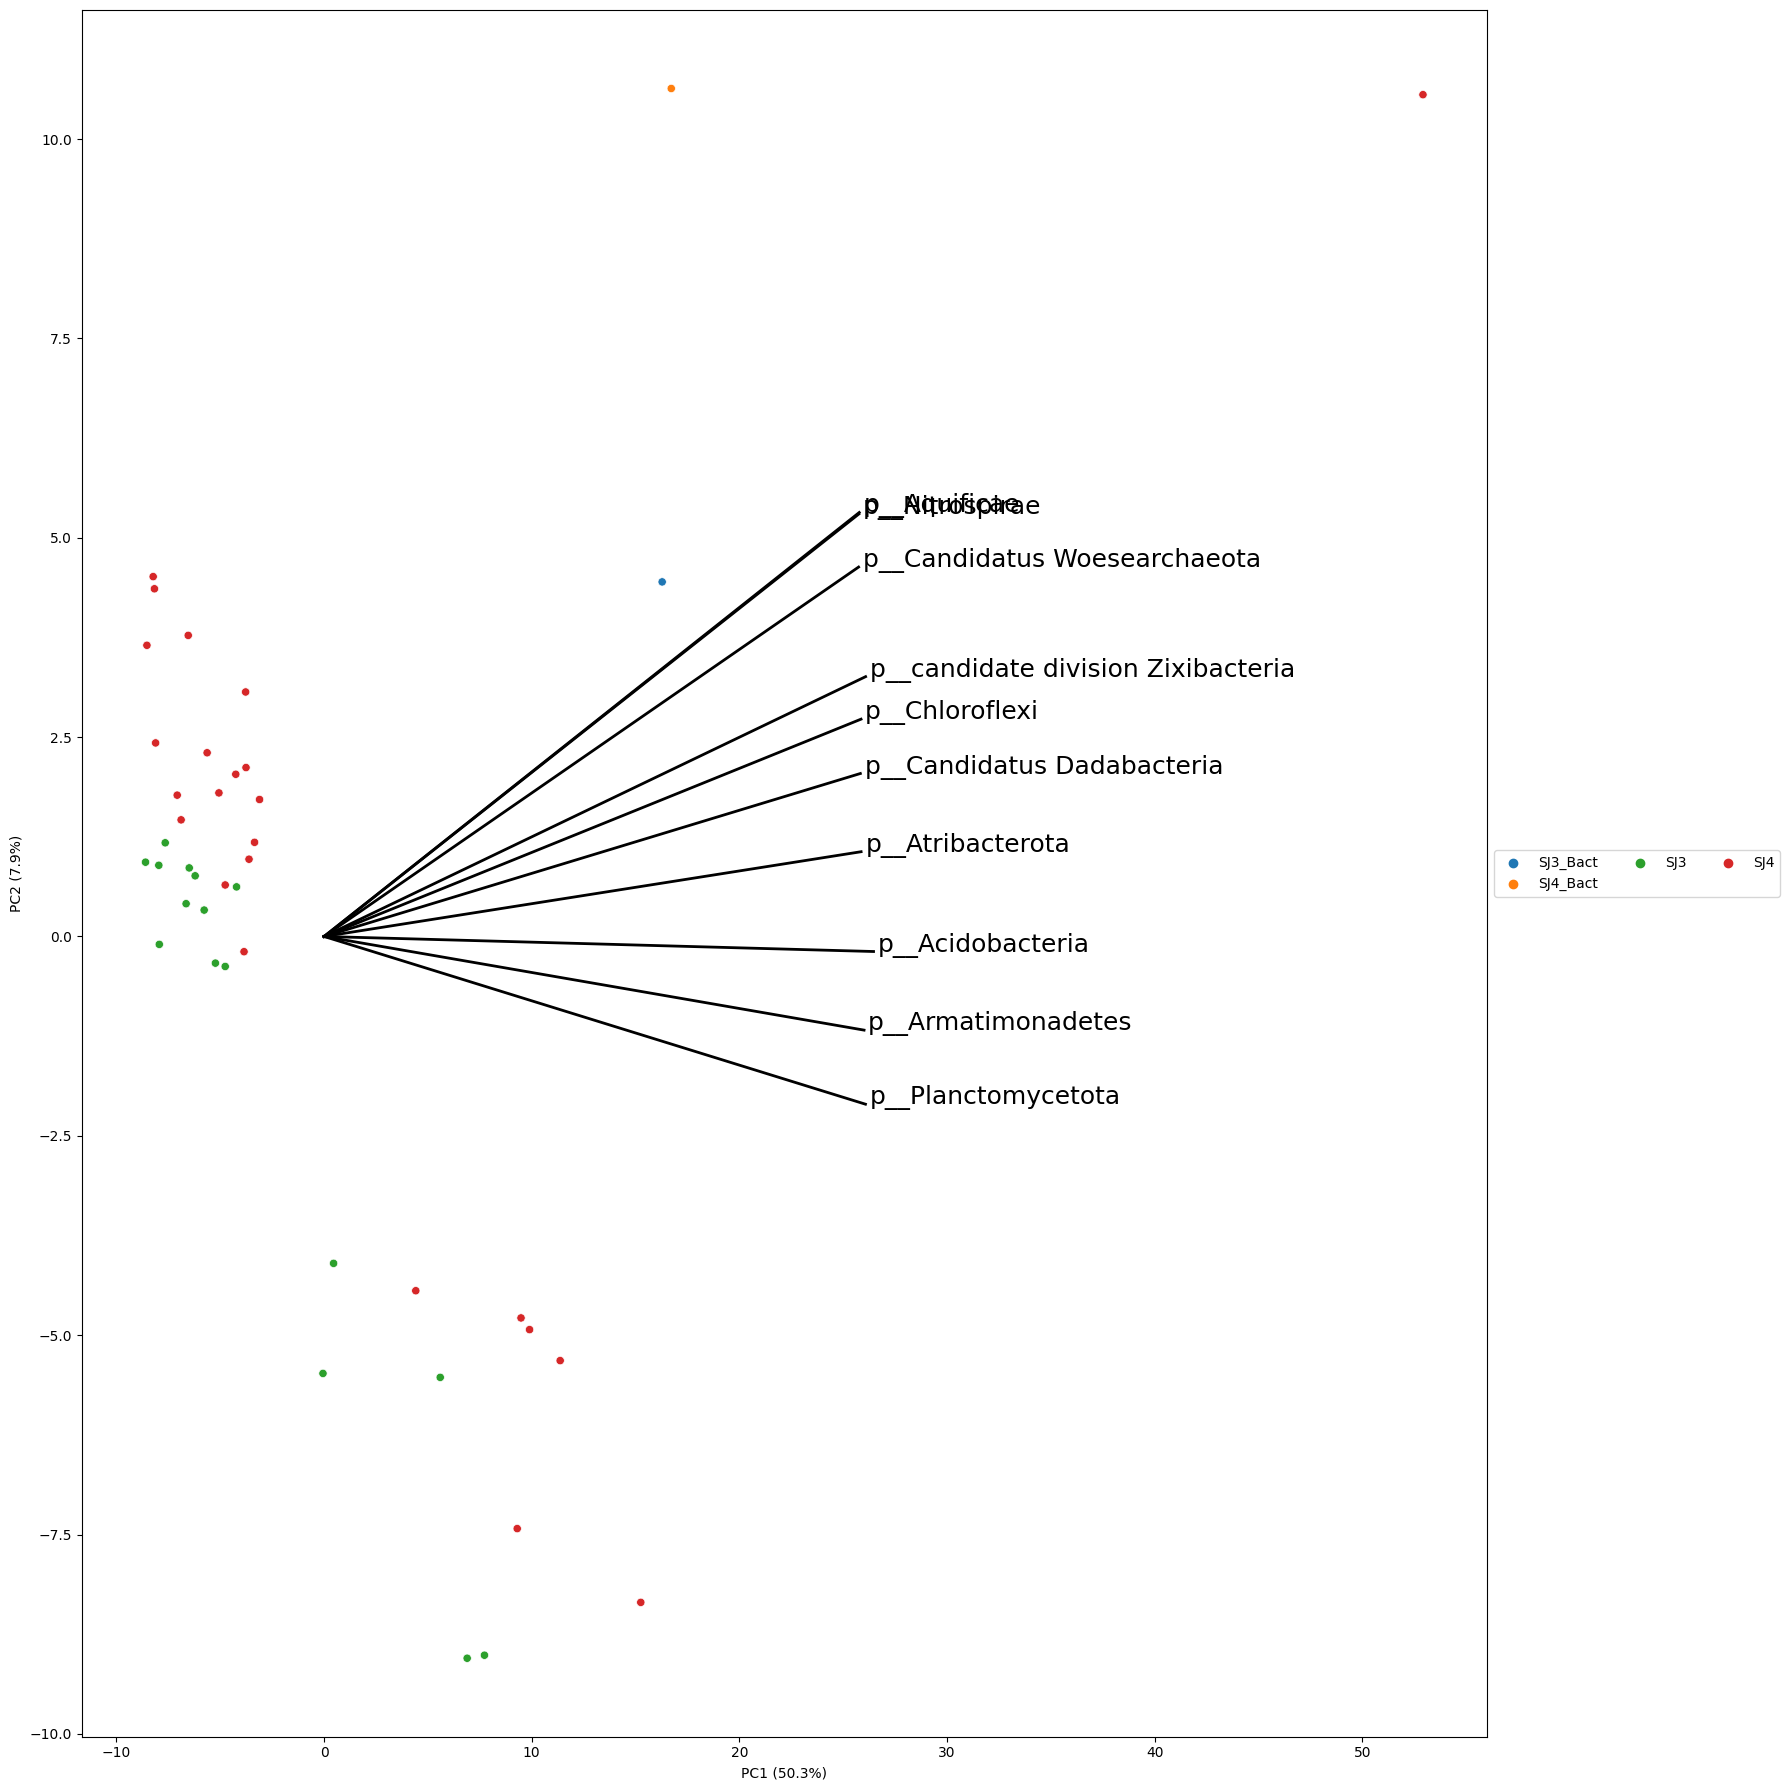

In [27]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Sample', legend=True, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pc_df.PC1)
mpy = max(pc_df.PC2)

for i, l in ldf.iterrows():
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

<Axes: xlabel='#NAME'>

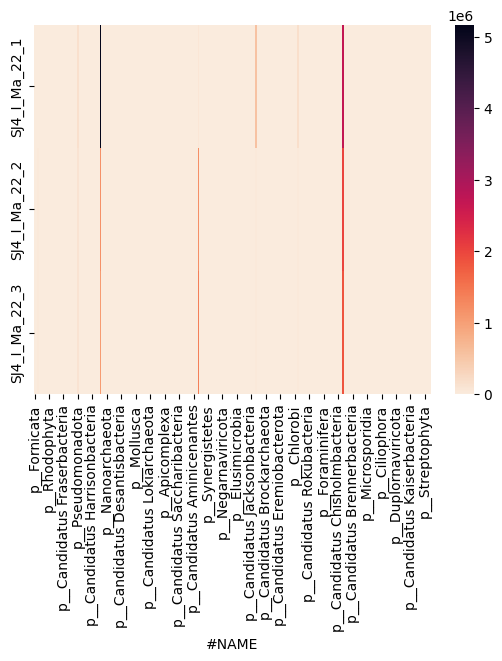

In [28]:
dfcontam = df.loc[['SJ4_I_Ma_22_1', 'SJ4_I_Ma_22_2', 'SJ4_I_Ma_22_3']]
sns.heatmap(data=dfcontam, cmap="rocket_r")

In [29]:
pc_df.sort_values('PC1', ascending=False).head(5)

,PC1,PC2,PC3,PC4,Label,Sample,Approach,Method,Filter,Rpt
21,52.923182,10.556114,2.799923,-8.986736,SJ4_I_Ma_22_1,SJ4,I,Ma,22,1
1,16.719560,10.633600,0.390656,6.158678,SJ4_Bact,SJ4_Bact,SJ4_Bact,SJ4_Bact,SJ4_Bact,SJ4_Bact
0,16.281288,4.446347,5.317423,13.824711,SJ3_Bact,SJ3_Bact,SJ3_Bact,SJ3_Bact,SJ3_Bact,SJ3_Bact
36,15.251378,-8.350001,-7.634998,1.972018,SJ4_I_Qi_22_1,SJ4,I,Qi,22,1
30,11.369294,-5.318326,-5.816257,1.596653,SJ4_I_Na_45_1,SJ4,I,Na,45,1


In [30]:
pc_df[pc_df['SampleApproachMethodFilter']=='SJ4IMa22']

KeyError: 'SampleApproachMethodFilter'

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
pc_df['SampleApproachMethodFilter'] = pc_df['Sample'] + pc_df['Approach'] + pc_df['Method'] + pc_df['Filter']
pc_df.at[0, 'SampleApproachMethodFilter'] = 'SJ3_Bact'
pc_df.at[1, 'SampleApproachMethodFilter'] = 'SJ4_Bact'

ax = sns.scatterplot(x="PC1", y="PC2", hue='SampleApproachMethodFilter', style='SampleApproachMethodFilter', legend=True, data=pc_df)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig(f"sarah/mmseqs_taxonomy/pca_combined_replicates.png")

# Contamination

# All subsystems

This is way overfitted!

### Note: We have 780 subsystems (variables), and we have 42 samples.

In [ ]:
df = pd.read_csv(f"sarah/subsystems/all_norm_ss_renamed.tsv", delimiter="\t")
df = df.set_index("#NAME")
# we put a space in front of these names so they sort to the beginning. Don't forget that later!
df2 = df.rename(columns={'SJ3_Bact': ' SJ3_Bact', 'SJ4_Bact': ' SJ4_Bact'})

df = df2.reindex(natsorted(df2.columns), axis=1)
df = df.T

# standardise the data
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

# run the PCA with 4 components
pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

# our labels from above have not changed
zipped = list(zip(df_pca[:,0],
                  df_pca[:,1],
                  df_pca[:,2],
                  df_pca[:,3],
                  df.index))
pc_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Label"])
pc_df = pd.concat([pc_df, labels], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)

ax = sns.scatterplot(x="PC1", y="PC2", hue='Sample', data=pc_df)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
l = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Label', legend=False, data=pc_df, ax=ax)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pc_df.PC1)
mpy = max(pc_df.PC2)

for i, l in ldf.iterrows():
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()